## Sloan Digital Sky Survey: Classification of celestial bodies using spectral emissions data


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import Sloan Digital Sky Survey Data


In [2]:
sloan = pd.read_csv('C:/Users/peeni/Documents/Datasets for Personal Machine Learning/Sloan Digital Sky Survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
sloan.shape

(10000, 18)

In [3]:
sloan.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


### Pull out features and class from data set removing all other irrelevant info
### In this case we use u, g, r, i, z and redshift

In [4]:
features = sloan.iloc[:,1:15]
classifier = sloan.iloc[:,13]


In [5]:

del features['run']
del features['rerun']
del features['camcol']
del features['field']
del features['specobjid']
del features['class']
del features['dec']
del features['ra']

In [6]:
features.head(2)

,u,g,r,i,z,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055


### Create a 150 row sample set for visualization. Data set too big for cross-plots! 

In [7]:
sample_set = sloan.iloc[0:100, 0:100]

In [8]:
sample_set.head(2)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541


In [9]:
del sample_set['objid']
del sample_set['run']
del sample_set['rerun']
del sample_set['camcol']
del sample_set['field']
del sample_set['specobjid']
del sample_set['dec']
del sample_set['ra']
del sample_set['plate']
del sample_set['mjd']
del sample_set['fiberid']

In [10]:
sample_set.head(2)

,u,g,r,i,z,class,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055


### Box plot of Sloan Sky Data by emission line and Redshift. 
#### ***data points overlayed in black***  

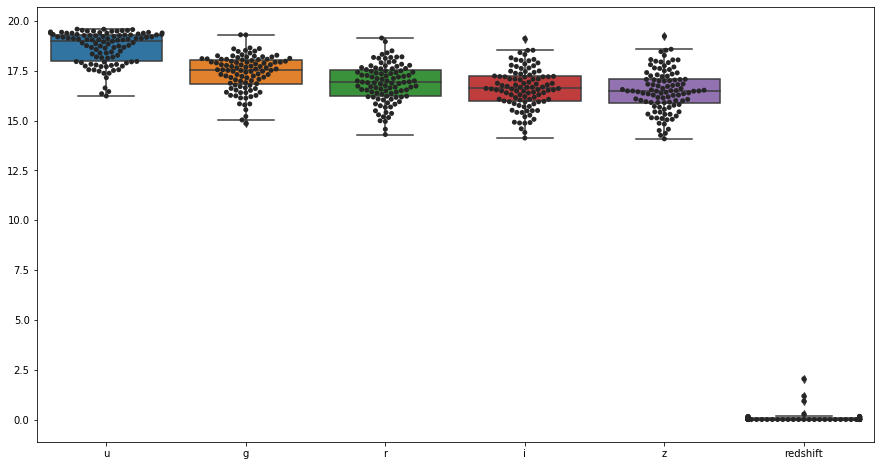

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(data = sample_set)
sns.swarmplot(data = sample_set, color = '0.15')


### Pairplot of Sample Data(Target class marked with colour) 

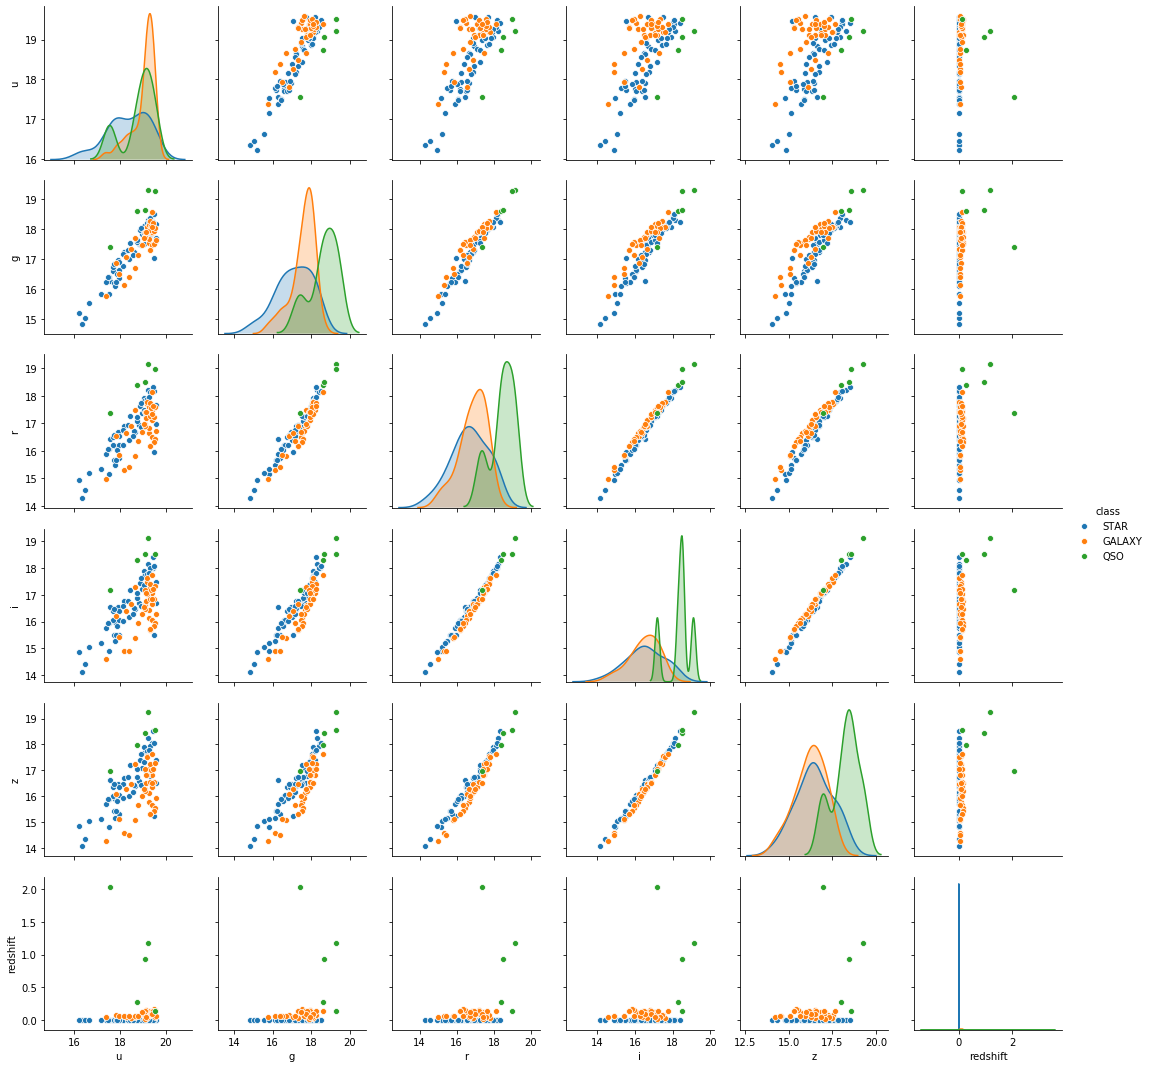

In [12]:
sns.pairplot(sample_set, hue = 'class')

### Prepping for Model Building

In [13]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

### Use Standard Scaler to scale variables

In [14]:
X = StandardScaler().fit_transform(features)#place sloan dataset features in a variable w/o lables
y = classifier  #add lables in a variable w/o features

In [15]:
y.head(5)

0      STAR
1      STAR
2    GALAXY
3      STAR
4      STAR
Name: class, dtype: object

In [16]:
y.unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42) #split the data into train and test

### Fit the model using kNN Classifier (simple model)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# # of classifiers (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit Model
knn.fit(X_train, y_train)

# Predict Species
predict = knn.predict(X_test)

# Model Accuracy
accuracy_score(y_test,predict)

0.9587878787878787

### Fit the model using Support Vector Machine Classifier

In [19]:
from sklearn.svm import SVC
supportVector = SVC()
supportVector.fit(X_train, y_train) 

# Predict species
predict = supportVector.predict(X_test)

# Model accuracy
accuracy_score(y_test,predict)

C:\Users\peeni\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9660606060606061

### Fit the model using Random Forest Classifier

In [20]:

from sklearn.ensemble import RandomForestClassifier

my_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
accuracy_score(y_test,predict)

C:\Users\peeni\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9660606060606061

### Notes to self: before removing variables dec, and ra kNN = 0.90878 and SVM and Random Forest = 0.95757
### Running models without scaling reduces accuracy by about 1%

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification